In [68]:
import time

def Fib_k_recursive(k):
    if (k == 0):
        return 0
    
    if (k == 1):
        return 1
    
    return Fib_k_recursive(k - 1) + Fib_k_recursive(k - 2)

def Fib_k_intermediate(k):
    if (k == 0):
        return 0
    
    fibs = [0, 1]
    
    for _ in range(k - 1):
        fibs.append(fibs[-1] + fibs[-2])
    
    return fibs[-1]

#A^k * (1, 0)^T

def Fib_k_quick(k):
    A = [[1, 1],
         [1, 0]]
    
    A_k = quick_power(A, k - 1)
    
    return A_k[0][0]

for i in range(3, 7000000, 1000000):
    #start_time = time.time()
    #_ = Fib_k_recursive(i)
    #recursive_time = time.time() - start_time
    
    #start_time = time.time()
    #_ = Fib_k_intermediate(i)
    #intermediate_time = time.time() - start_time

    start_time = time.time()
    _ = Fib_k_quick(i)
    quick_time = time.time() - start_time
    
    #if (i % 1000 == 0):
    print(i, quick_time)

3 1.71661376953125e-05
1000003 0.12787890434265137
2000003 0.33915090560913086
3000003 0.7655029296875
4000003 1.027043104171753
5000003 1.5776739120483398
6000003 2.317592144012451


In [49]:
import numpy as np

A = np.array([[1, 2],
              [3, 4]])

B = np.array([[3, 3],
              [6, 3]])

#print(A @ B)

def quick_power(A, k):
    R = np.eye(A.shape[0], dtype = np.int16)
    R = R @ A
    
    bits = '{0:b}'.format(k)
    
    #print(bits)
    
    #print(R)
    #print()
    
    for bit in bits[1:]:
        R = R @ R
        #print(R)
        
        if (bit == '1'):
            R = R @ A
        
        #print(bit)
        #print(R)
        #print()
    
    return R

C = np.array([[1, 1],
              [1, 1]], np.int16)

print(type(C[0, 0]))

print(quick_power(C, 16))

<class 'numpy.int16'>
[[-32768 -32768]
 [-32768 -32768]]


In [25]:
k = 13

bits = '{0:b}'.format(k)

print(bits)

1101


In [27]:
k = 13

while(k != 0):
    if (k // 2 * 2 == k):
        print('0')
    
    else:
        print('1')
    
    k = k // 2

1
0
1
1


In [52]:
num = 1

for _ in range(150):
    print(num)
    num *= 2

1
2
4
8
16
32
64
128
256
512
1024
2048
4096
8192
16384
32768
65536
131072
262144
524288
1048576
2097152
4194304
8388608
16777216
33554432
67108864
134217728
268435456
536870912
1073741824
2147483648
4294967296
8589934592
17179869184
34359738368
68719476736
137438953472
274877906944
549755813888
1099511627776
2199023255552
4398046511104
8796093022208
17592186044416
35184372088832
70368744177664
140737488355328
281474976710656
562949953421312
1125899906842624
2251799813685248
4503599627370496
9007199254740992
18014398509481984
36028797018963968
72057594037927936
144115188075855872
288230376151711744
576460752303423488
1152921504606846976
2305843009213693952
4611686018427387904
9223372036854775808
18446744073709551616
36893488147419103232
73786976294838206464
147573952589676412928
295147905179352825856
590295810358705651712
1180591620717411303424
2361183241434822606848
4722366482869645213696
9444732965739290427392
18889465931478580854784
37778931862957161709568
75557863725914323419136
151

In [54]:
import numpy as np

def multiply_2_2(A, B):
    C = [[0,0], 
         [0,0]]
    
    C[0][0] = A[0][0] * B[0][0] + A[0][1] * B[1][0]
    C[0][1] = A[0][0] * B[0][1] + A[0][1] * B[1][1]
    C[1][0] = A[1][0] * B[0][0] + A[1][1] * B[1][0]
    C[1][1] = A[1][0] * B[0][1] + A[1][1] * B[1][1]
    
    return C

def quick_power(A, k):
    R = [[1, 0],
         [0, 1]]
    
    R = multiply_2_2(R, A)
    
    bits = '{0:b}'.format(k)
        
    for bit in bits[1:]:
        R = multiply_2_2(R, R)
        
        if (bit == '1'):
            R = multiply_2_2(R, A)
    
    return R

C = [[1, 1],
     [1, 1]]

print(type(C[0][0]))

print(quick_power(C, 16))

<class 'int'>
[[32768, 32768], [32768, 32768]]


In [84]:
import time

def find_max_slow(a):
    n = len(a)
    
    comparisons = np.zeros((n, n), np.int32)
    
    for i in range(n):
        for j in range(n):
            if (a[i] >= a[j]):
                comparisons[i, j] = 1
    
    #print(comparisons)
    
    sums = np.sum(comparisons, axis = 1)
    #print(sums)
    
    for i in range(n):
        if (sums[i] == n):
            return a[i]

def find_max_fast(a):
    m = a[0]
    
    for i in range(1, len(a)):
        if (a[i] > m):
            m = a[i]
    
    return m

arr = [2, 1, 3, 6, 9, 33, 2, 1, 2]

lens = []
times_slow = []
times_fast = []

for i in range(10, 500, 50):
    start_time = time.time()
    find_max_slow(arr * i)
    comp_time = time.time() - start_time
    times_slow.append(comp_time)
    
    start_time = time.time()
    find_max_fast(arr * i)
    comp_time = time.time() - start_time
    times_fast.append(comp_time)
    
    lens.append(len(arr) * i)

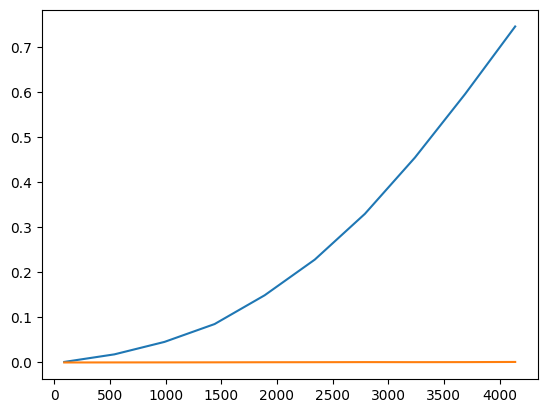

In [82]:
import matplotlib.pyplot as plt

plt.plot(lens, times_slow)
plt.plot(lens, times_fast)
plt.show()

In [90]:
import time

arr = [2, 1, 3, 6, 9, 33, 2, 1, 2]

lens = []
times_slow = []
times_fast = []

for i in range(10, 500000, 5000):
    start_time = time.time()
    find_max_fast(arr * i)
    comp_time = time.time() - start_time

    times_fast.append(comp_time)    
    lens.append(len(arr) * i)

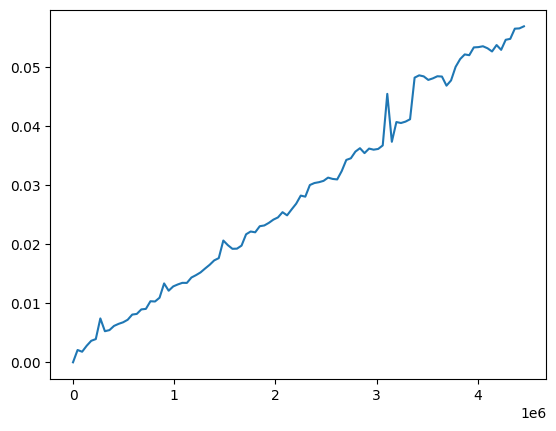

In [91]:
plt.plot(lens, times_fast)
plt.show()

In [105]:
def gcd(a, b):
    #ax + by = d
    
    a, b = max(a, b), min(a, b)
    
    a_s, b_s, f_s = [], [], []
    
    while(b != 0):
        r = a % b
        f = (a - r) // b

        a_s.append(a)
        b_s.append(b)
        f_s.append(f)
        
        print(a, b, r)
        
        a = b
        b = r
    
    d = a
    
    #x = y'
    #y = x' - floor(f) y'
    x, y = 1, 0
    
    for f in f_s[::-1]:
        x_pred = x
        x = y
        y = x_pred - f * y
    
    #print(a, b)
    
    return d, x, y

#ax + by = d
a = 37
b = 7

d, x, y = gcd(a, b)

print(a, " * ", x, " + ", b, " * ", y, " = ", d)

37 7 2
7 2 1
2 1 0
37  *  -3  +  7  *  16  =  1
